In [2]:
import os
print(os.getcwd())

# from ISOData import isodata_classification #(img, parameters=None)
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK=True
except: HAS_SK=False; print('Please install sklearn for layer visualization')
    
    
    
from IPython.display import HTML as html_print
def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

# left, word, right = 'foo' , 'abc' , 'bar'
# html_print(cstr(' '.join([left, cstr(word, color='red'), right]), color='black') )

/Users/yi.liu/Dropbox/Work@IMR/Clustering-Braodband-master


array([0, 0, 0, ..., 4, 4, 4])

In [44]:
sz = 2000
n_clusters = 5

x1 = np.array([[0, 0, 20]]*sz)
x2 = np.array([[7, 0, 20]]*sz)
x3 = np.array([[-5, 0, 20]]*sz)
x4 = np.array([[7, 5, 20]]*sz)
x5 = np.array([[0, -5, 20]]*sz)


labels = np.array([0,1,2,3,4]*sz).reshape(5,-1).T.reshape(-1)
data = np.vstack((x1,x2, x3, x4, x5))
data = data + np.random.randn(data.shape[0], data.shape[1])*4
data.shape
# print(np.random.randn(50,3))
# d = np.array()

(10000, 3)

In [45]:
ind_rand =  np.random.permutation(data.shape[0])

data_fit = data[ ind_rand[:int(data.shape[0]/2)] ]
data_pre = data[ ind_rand[int(data.shape[0]/2):]   ]

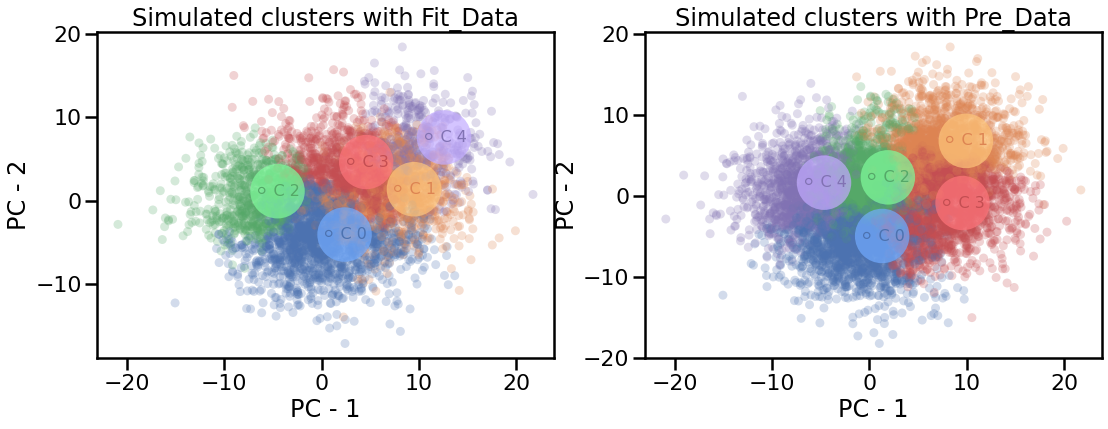

In [48]:
ind_rand =  np.random.permutation(data.shape[0])

data_fit = data[ ind_rand[:int(data.shape[0]/2)] ]
data_pre = data[ ind_rand[int(data.shape[0]/2)-4000:]   ]

def plot_clusters(ax, data, labels, alg_name = ''):
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = ax
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)
    ax.set_xlabel("PC" + " - 1")
    ax.set_ylabel("PC" + " - 2")
    ax.set_title('Simulated clusters with {}'.format(alg_name), fontsize=24)
    
    for i in np.unique(labels):
        ax.text(data.T[0,labels==i].mean(), data.T[1,labels==i].mean(), \
                 "\u26AA C " + str(i), color = [p for p in palette[i]], \
                 bbox=dict(facecolor=[min(p*1.5,1) for p in palette[i]], edgecolor='None',\
                           boxstyle = "Circle", alpha=0.7), fontsize=16)

ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ac_model = ac.fit(data_pre)
label_fit = ac_model.fit_predict(data_fit)
label_pre = ac_model.fit_predict(data_pre)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

plot_clusters(ax1, data_fit, label_fit, alg_name="Fit_Data")
plot_clusters(ax2, data_pre, label_pre, alg_name="Pre_Data")

Centroids: 
[[ 0.05149783 -4.61370252 20.81285822]
 [ 7.17561848  0.81358236 16.75755452]
 [-6.83516746  0.57798688 19.89101987]
 [ 2.28150787  4.0706836  21.3070113 ]
 [10.26852325  7.01835486 22.40188896]]
[[-1.0030741  -5.50611981 21.01704686]
 [ 7.58972359  6.23657391 19.05304495]
 [-0.41548164  1.73351756 19.04774048]
 [ 7.25676204 -1.43845179 20.03218474]
 [-6.97460461  1.0776669  20.86534443]]


Labels: 
[0 1 2 3 4]
[0 1 2 3 4]


Two clustered results have the same labels
False
Labels of data 2 - before and after switching:
[0 1 2 3 4]
[0 4 3 1 2]
Label data of data2-before and after switching:
[3 3 2 ... 2 2 4]
[1 1 3 ... 3 3 2]


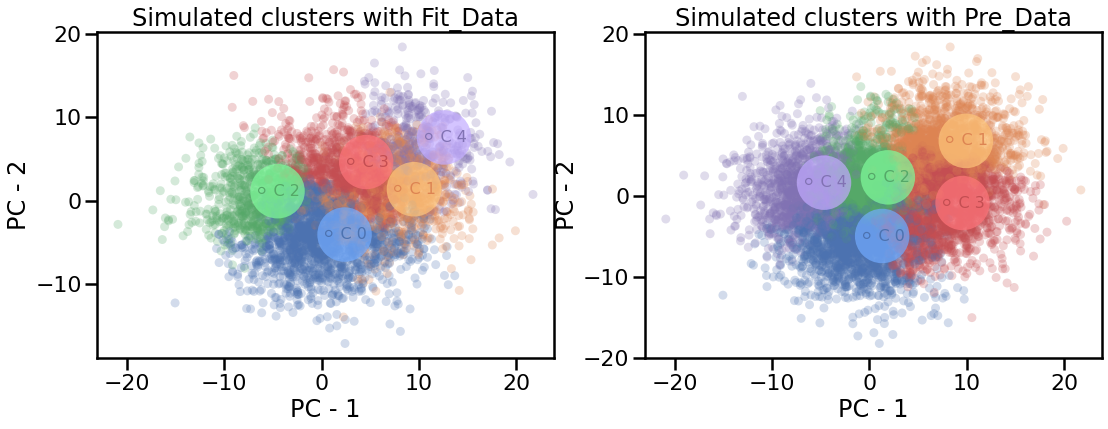

In [49]:
from sklearn.neighbors import KNeighborsClassifier as knn
def make_label_consistent(data1, label1, data2, label2):
    
    centroids1 = []
    centroids2 = []
    # Get the centroids of two clustered results
    for i in np.unique(label1):
        centroids1.append( np.mean(data1[label1==i], axis = 0) )
        centroids2.append( np.mean(data2[label2==i], axis = 0) )
        
    centroids1 = np.array(centroids1)
    centroids2 = np.array(centroids2)
    print("Centroids: ", centroids1, centroids2, '\n', sep='\n')
    
    # Check if these two clustered results have the same labels 
    lab1 = np.unique(label1)
    lab2 = np.unique(label2)
    print("Labels: ", lab1, lab2, '\n', sep='\n')
    
    if sum(lab1==lab2) == len(lab1):
        print("Two clustered results have the same labels")
        
    # Prepare one clustered result {centroids, [0,1,2,..K]} as training 
    X = centroids1
    Y = np.unique(label1)
        
    mknn = knn(n_neighbors=1)
    mknn.fit(X,Y)
    
    lab2_knn = mknn.predict(centroids2)
    
    print(sum(lab2_knn==lab2) == len(lab2))
    print("Labels of data 2 - before and after switching:", lab2, lab2_knn, sep='\n')
    
    # switch the labels of data2 to be consistent with data 1
    label2_post = np.zeros(label2.shape,dtype = int)
        
    for i in lab2:
        label2_post[label2==i] = lab2_knn[i]
    print("Label data of data2-before and after switching:", label2, label2_post, sep='\n' )

#     plt.figure(figsize=(7,6))
#     ax = plt.axes()
#     plot_clusters(ax, data2, label2_post, alg_name="Fit_Data")

make_label_consistent(data_fit, label_fit, data_pre, label_pre)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
plot_clusters(ax1, data_fit, label_fit, alg_name="Fit_Data")
plot_clusters(ax2, data_pre, label_pre, alg_name="Pre_Data")

In [137]:
lab1 = np.array([1,2,2])
lab2 = np.array([1,2,3])
sum(lab1==lab2)

2

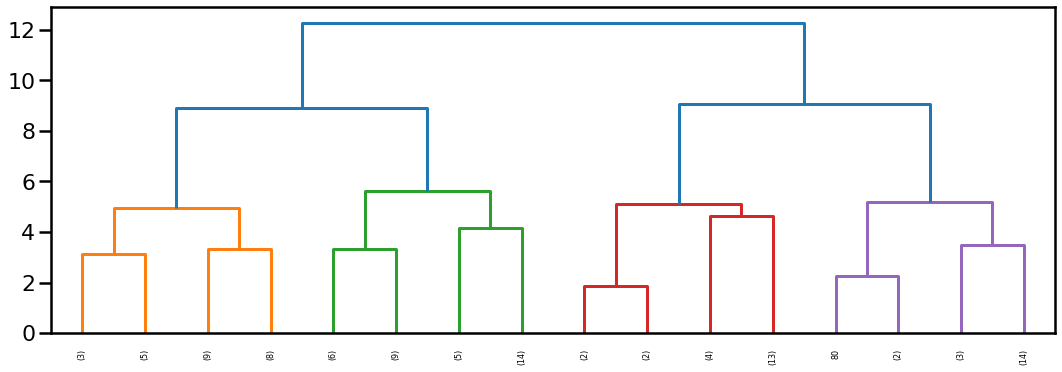

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram


Z = linkage(data[:100], method='ward',metric='euclidean') 

# plot linkage of samples by clusters with dendrogram
Z.shape
plt.figure(figsize=(18, 6))
dendrogram(Z, leaf_rotation=90, truncate_mode='level', p=3, leaf_font_size=8)

plt.show()

In [15]:
print('Index {:10d},  from {:10d} to {:10d}'.format(1, 23423423, 5335))
print('Index {:10d},  from {:10d} to {:10d}'.format(1546584, 23423, 5335545))
print('Index {:10d},  from {:10d} to {:10d}'.format(100, 2342, 533145))

Index          1, range 23423423 to     5335
Index    1546584, range    23423 to  5335545
Index        100, range     2342 to   533145
